
<h2 align="center">   PCA with the iris dataset </h2>


## Goals

- Implementing PCA to reduct the dimentions

In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


### Introduction

The**PCA (Principal Component Analysis)** is a statistical technique used to reduce the dimensionality of data while retaining the maximum amount of information. It transforms a set of possibly correlated variables into a new set of variables (called **principal components**) that are linearly independent. Below are the steps involved in performing PCA:

- Step 1: Centering and Scaling the Data 
- Step 2: Computing the Covariance Matrix
- Step 3: Calculating the Eigenvalues
- Step 4: Calculating the Eigenvectors
- Step 5: Selecting Principal Components 
- Step 6: Projecting the Data onto the Principal Components

### Dataset


We are using the **Iris** dataset. This dataset consists of 50 samples from each of the three species of Iris. The rows represent the samples, and the columns are as follows: Sepal Length, Sepal Width, Petal Length, and Petal Width. Load the dataset:

In [24]:
iris =  load_iris()
X = iris['data']
y = iris['target']

m, n =  X.shape

print("number of examples:", m)
print("number of variables:", n)

number of examples: 150
number of variables: 4



### Step 1: Centering and Scaling the Data 

- This involves normalizing the data by subtracting the mean and scaling it to have a standard deviation of one, ensuring all features contribute equally to the analysis.
  


In [14]:
def standardize_data(X):
    return ( X- np.mean(X , axis=0))/ np.nanstd(X, axis=0)

Application on iris

In [15]:
iris_standarized = standardize_data(X)
iris_standarized[1] 

array([-1.14301691, -0.13197948, -1.34022653, -1.3154443 ])

### Step 2: Computing the Covariance Matrix

 The covariance matrix is calculated to understand the relationships between the variables, specifically how changes in one variable correspond to changes in another.

In [16]:
def covariance_matrix(x): 
    return (1/(m-1))* np.dot(x.T, x )

Covarince matrix for the iris dataset



In [17]:
cov_mat =  covariance_matrix(iris_standarized)
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

### Step 3: Calculating the Eigenvalues

The eigenvalues indicate the amount of variance captured by each principal component. They are computed from the covariance matrix.

### Step 4: Calculating the Eigenvectors

The eigenvectors are the directions in the feature space that represent the new axes (principal components). Each eigenvector corresponds to a direction where the data has maximum variance.

To do this we use :
- `numpy.linalg.eig`


In [23]:
eig_values, eig_vectors = np.linalg.eig(cov_mat)
print('eigenvalues \n', eig_values)
print('eigenvectors \n', eig_vectors)

eigenvalues 
 [2.93808505 0.9201649  0.14774182 0.02085386]
eigenvectors 
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


### Step 5: Selecting Principal Components 

Based on the eigenvalues, we select the principal components that explain the most variance in the data. This step involves deciding how many components to keep, typically based on a threshold like 90% of the total variance.


Providing the explained variance for each principal component (PC) as well as the cumulative explained variance.

In [20]:
eig_values_total = np.sum(eig_values)
explained_variance =  (eig_values/ eig_values_total)*100
explained_variance = np.round(explained_variance, 2) 
cum_explained_variance = np.cumsum(explained_variance)

In [22]:
print(f'explained variance : {explained_variance}')
print(f'cumulative explained variance: {cum_explained_variance}')

explained variance : [72.96 22.85  3.67  0.52]
cumulative explained variance: [ 72.96  95.81  99.48 100.  ]


Visualize using a plot of the eigenvalues (scree plot: see plot.png) the explained variance and the cumulative explained variance.

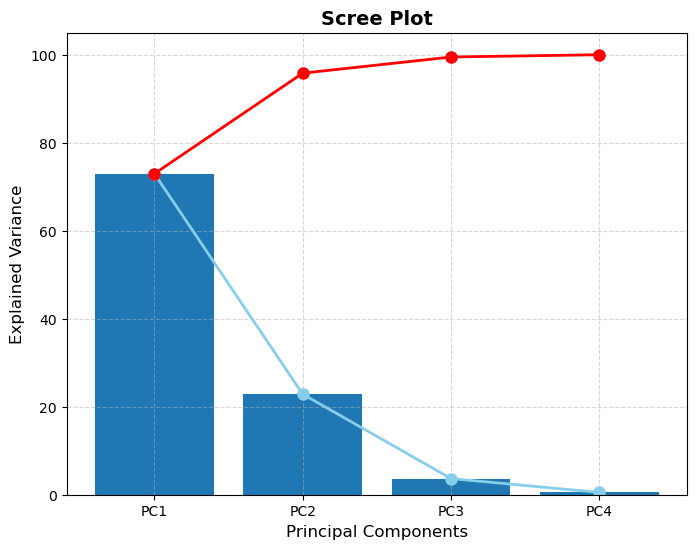

In [ ]:
tick_labels = ['PC' + str(i+1) for i in range(n)]

fig, ax = plt.subplots(figsize=(8, 6))


ax.bar(np.arange(1,n+1), height=explained_variance, tick_label=tick_labels)
ax.plot(np.arange(1, n+1), explained_variance, c='skyblue', marker='o', linestyle='-', linewidth=2, markersize=8, label='Explained Variance')
ax.plot(np.arange(1, n+1), cum_explained_variance, c='red', marker='o', linestyle='-', linewidth=2, markersize=8, label='Cumulative Explained Variance')
ax.set_title('Scree Plot', fontsize=14, fontweight='bold')
ax.set_xlabel('Principal Components', fontsize=12)
ax.set_ylabel('Explained Variance', fontsize=12)

ax.grid(True, linestyle='--', alpha=0.5)



Based on the results, the ideal number of principal components (PCs) is 2. Choose the important principal components.

In [27]:
nb_pc = 2
weights = eig_vectors[:, :nb_pc]
weights.shape

(4, 2)

### Step 6: Projecting the Data onto the Principal Components

In this final step, the data is projected onto the selected principal components, effectively reducing the number of dimensions while retaining the most significant information. This is how the dimensionality reduction is achieved.

In [28]:
def transform(X,principal_components):
    X = X.copy()
    return np.dot(standardize_data(X),principal_components)


Transformer les données:

In [29]:
X_proj = transform(X,eigen_vectors)
X_proj.shape

(150, 4)


Visualize the data in a scatter plot using PC1 and PC2. Use the labels to color the examples.

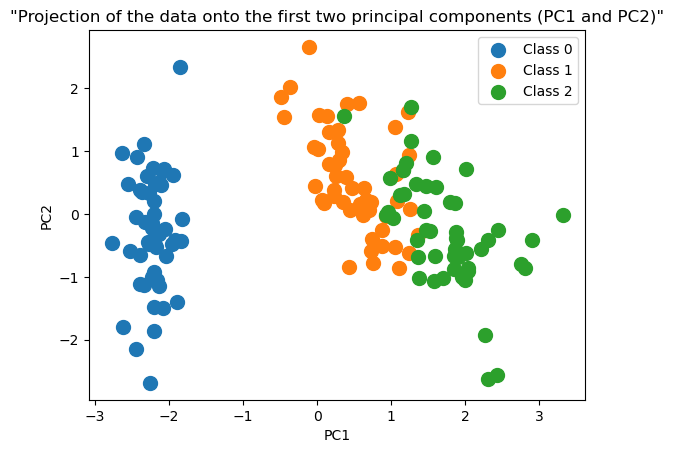

In [ ]:

for label in np.unique(y):   
    
    plt.scatter(X_proj[y==label, 0], X_proj[y==label, 1], 
                label=f'Class {label}',  
                s=100)  
plt.title('"Projection of the data onto the first two principal components (PC1 and PC2)"')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()


We will encapsulate all the concepts discussed in the previous section into a Python class with the following methods:



- __init__
- fit
- transform
- plot_explained_variance

Complete the following class, test it on the Iris dataset, and then compare the results with those obtained in the previous section.

In [52]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        pass
    
    def fit(self, X):
        # step1
        def standardize_data(X):
            return ( X- np.mean(X , axis=0))/ np.std(X, axis=0)

        # step2
        def covariance_matrix(x): 
            return np.cov(X_std, rowvar=False)

        # step3
        eig_values, eig_vectors = np.linalg.eig(cov_mat)


        # step4
        sorted_indices = np.argsort(eig_values)[::-1]  
        eig_values = eig_values[sorted_indices]
        eig_vectors = eig_vectors[:, sorted_indices]

        # step5
        self.eig_values = eig_values[:self.n_components]
        self.eig_vectors = eig_vectors[:, :self.n_components]

        
        total_variance = np.sum(eig_values)
        self.explained_variance_ratio_ = self.eig_values / total_variance

        pass

    def transform(self, X):
        # step6
        X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0) 
        return np.dot(X_std, self.eig_vectors) 

        pass

    def plot_scree(self):   
        # Explained variance
        explained_variance = self.explained_variance_ratio_

        # Cumulative explained variance
        cum_explained_variance = np.cumsum(explained_variance)

        # Number of components
        n = len(explained_variance)

        # Tick labels
        tick_labels = ['PC' + str(i + 1) for i in range(n)]

        # Create the plot
        fig, ax = plt.subplots(figsize=(8, 6))

        # Bar plot for explained variance
        ax.bar(np.arange(1, n + 1), height=explained_variance, tick_label=tick_labels, color='lightblue', alpha=0.7)

        # Line plot for explained variance
        ax.plot(np.arange(1, n + 1), explained_variance, c='skyblue', marker='o', linestyle='-', linewidth=2, markersize=8, label='Explained Variance')

        # Line plot for cumulative explained variance
        ax.plot(np.arange(1, n + 1), cum_explained_variance, c='red', marker='o', linestyle='-', linewidth=2, markersize=8, label='Cumulative Explained Variance')

        # Title and labels
        ax.set_title('Scree Plot', fontsize=14, fontweight='bold')
        ax.set_xlabel('Principal Components', fontsize=12)
        ax.set_ylabel('Explained Variance', fontsize=12)

        # Add grid, legend, and show the plot
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.legend()
        plt.show()

        pass

    def plot_explained_variance(self):
        
        
        plt.figure(figsize=(8, 5))
        plt.bar(range(1, self.n_components + 1), self.explained_variance_ratio_, color='blue', alpha=0.7)
        plt.xlabel('Principal Components')
        plt.ylabel('Explained Variance')
        plt.title('Explained Variance by Each Principal Component')
        plt.show()
        pass


let s test it

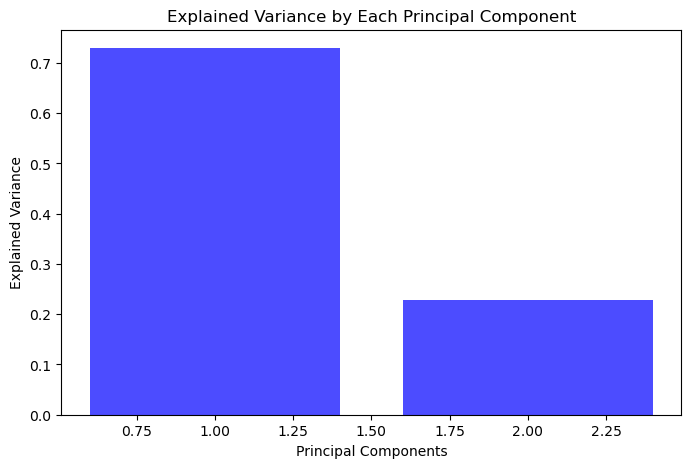

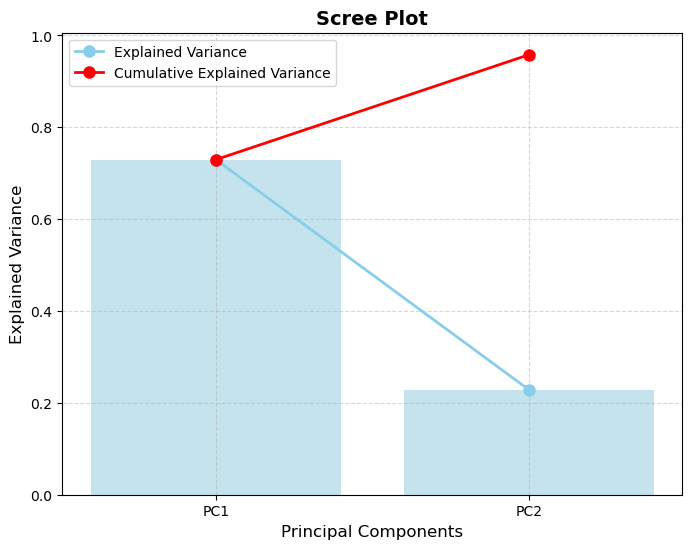

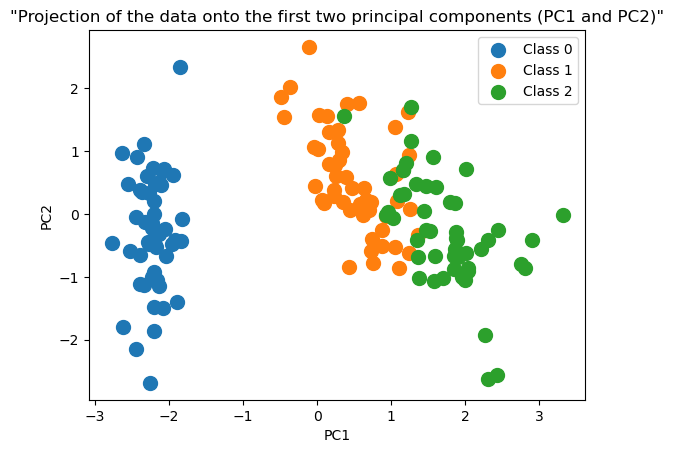

In [ ]:
# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit the PCA model to the Iris dataset
pca.fit(X)

# Transform the data using the fitted PCA model
X_proj = pca.transform(X)

# Plot the explained variance ratio
pca.plot_explained_variance()

# Plot the Scree plot (explained variance and cumulative explained variance)
pca.plot_scree()

# Visualize the data projected on the first two principal components
for label in np.unique(y):
    plt.scatter(X_proj[y==label, 0], X_proj[y==label, 1], 
                label=f'Class {label}',  
                s=100)  
plt.title('"Projection of the data onto the first two principal components (PC1 and PC2)"')
plt.xlabel('PC1')
plt.ylabel('PC2')


plt.legend()
